In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import glob
import itertools
import collections
import os
import imageio
from scipy import misc
from PIL import Image
import shutil
from resizeimage import resizeimage

%matplotlib inline

In [2]:
train_files = list(glob.iglob('../../data/plant-seed/download/train/**/*.png', recursive=True))
test_files = list(glob.iglob('../../data/plant-seed/download/test/**/*.png', recursive=True))

### data explore

In [3]:
print('lenght of trainset:', len(train_files))
print('length of testset:', len(test_files))

lenght of trainset: 4750
length of testset: 794


In [4]:
classes = collections.Counter([x.split('/')[-2] for x in train_files])

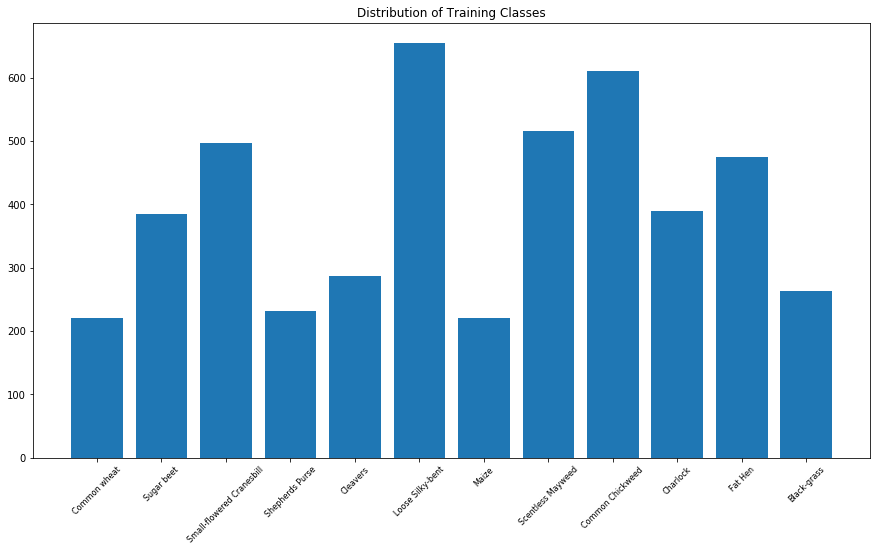

In [5]:
plt.figure(figsize=(15,8))
plt.bar(range(len(classes)), classes.values())
plt.xticks(range(len(classes)), classes.keys(), fontsize=8, rotation=45)
plt.title('Distribution of Training Classes')
plt.show()

### create validation sample

In [6]:
np.random.seed(123)
valid_files = np.random.choice(train_files, size=750, replace=False)
train_files = [x for x in train_files if x not in valid_files]
print('lenght of trainset:', len(train_files))
print('length of validset:', len(valid_files))

lenght of trainset: 4000
length of validset: 750


In [7]:
def copy(file, save):
    try:
        shutil.copy(file, save)
    except IOError:
        directory = save[:-13]
        os.makedirs(directory)
        shutil.copy(file, save)
    return None

In [8]:
for idx, file in enumerate(train_files):
    # convert(file, file.replace('download','data'))
    copy(file, file.replace('download','data'))
    if idx % 1000 == 0:
        print('{} files transferred'.format(idx))
    
print('data description:')
print('# of images:', len(list(glob.iglob('../../data/plant-seed/data/train/**/*.png', recursive=True))))

0 files transferred
1000 files transferred
2000 files transferred
3000 files transferred
data description:
# of images: 4000


In [9]:
for idx, file in enumerate(valid_files):
    # convert(file, file.replace('download','data').replace('train','valid'))
    copy(file, file.replace('download','data').replace('train','valid'))
    if idx % 500 == 0:
        print('{} files transferred'.format(idx))

print('data description:')
print('# of images:', len(list(glob.iglob('../../data/plant-seed/data/valid/**/*.png', recursive=True))))

0 files transferred
500 files transferred
data description:
# of images: 750


In [10]:
!cp -r ../../data/plant-seed/download/test/ ../../data/plant-seed/data/test/
print('data description:')
print('# of images:', len(list(glob.iglob('../../data/plant-seed/data/test/*.png', recursive=True))))

data description:
# of images: 794


### resize images

In [11]:
train_files = list(glob.iglob('../../data/plant-seed/data/train/**/*.png', recursive=True))
valid_files = list(glob.iglob('../../data/plant-seed/data/valid/**/*.png', recursive=True))
test_files  = list(glob.iglob('../../data/plant-seed/data/test/**/*.png', recursive=True))

In [12]:
def scale_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    width_height_tuple = (224, 224)
    if img.size != width_height_tuple:
        resample = Image.NEAREST
        img = img.resize(width_height_tuple, resample)
    img.save(path)
    return None

In [13]:
sizes = []
for idx, file in enumerate(train_files + valid_files + test_files):
    scale_image(file)
    sizes.append(Image.open(file).size)
    if idx % 1000 == 0:
        print('{} images processed.'.format(idx))

0 images processed.
1000 images processed.
2000 images processed.
3000 images processed.
4000 images processed.
5000 images processed.


In [14]:
print('unique sizes:', set(sizes))

unique sizes: {(224, 224)}


### class images

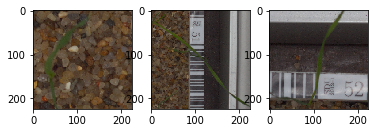

In [15]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Black-grass/0183fdf68.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Black-grass/0260cffa8.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Black-grass/075d004bc.png'))
plt.show()

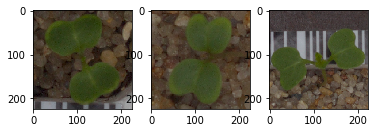

In [16]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Charlock/084a9cb18.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Charlock/09f038ce4.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Charlock/137c4e78e.png'))
plt.show()

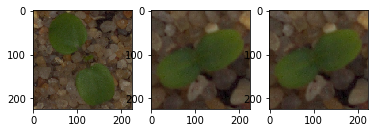

In [17]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Cleavers/01605ed73.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Cleavers/06f447848.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Cleavers/06f447848.png'))
plt.show()

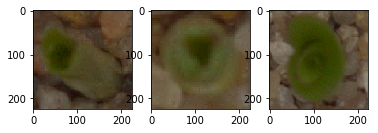

In [18]:
plt.figure(figsize=(10,5))
f, axarr = plt.subplots(1,3)
axarr[0].imshow(Image.open('../../data/plant-seed/data/valid/Maize/0184ec53f.png'))
axarr[1].imshow(Image.open('../../data/plant-seed/data/valid/Maize/16e38d4af.png'))
axarr[2].imshow(Image.open('../../data/plant-seed/data/valid/Maize/19f880311.png'))
plt.show()